# Importation des librairies

In [1]:
# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 
import pandas_profiling as pp

# SEABRON
import seaborn as sns

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # normalisation des variables numériques
from sklearn.preprocessing import RobustScaler # normalisation des variables numériques
from sklearn.impute import SimpleImputer # remplissage des valeurs manquantes
from sklearn.impute import KNNImputer # remplissage des valeurs manquantes

# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression # régréssion logistique
from sklearn.svm import LinearSVC, SVC # machines à vecteurs de support

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import RandomizedSearchCV # tester arbitrairement plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score # exactitude (accuracy)
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # matrice de confusion
from sklearn.metrics import plot_confusion_matrix # graphique de la matrice de confusion
from sklearn.metrics import classification_report # rapport pour le modèle de classification

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

# SCIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Chargement des données

In [2]:
import os
assurance_data = pd.read_csv('C:/Users/cleme/Downloads/assurance.csv')

# Description des données

In [3]:
assurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
assurance_data.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
assurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
assurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
Assurance = assurance_data.copy()

In [8]:
Assurance["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
5       southeast
6       southeast
7       northwest
8       northeast
9       northwest
10      northeast
11      southeast
12      southwest
13      southeast
14      southeast
15      southwest
16      northeast
17      northeast
18      southwest
19      southwest
20      northeast
21      southwest
22      southeast
23      northeast
24      northwest
25      southeast
26      northeast
27      northwest
28      northwest
29      southwest
30      southwest
31      northeast
32      southwest
33      northwest
34      southwest
35      northwest
36      northwest
37      southwest
38      northeast
39      southwest
40      northeast
41      southeast
42      southeast
43      southeast
44      northeast
45      southwest
46      northeast
47      northwest
48      southeast
49      southeast
50      northeast
51      northwest
52      southwest
53      southeast
54      northwest
55      no

In [9]:
pp.ProfileReport(Assurance) # Une petite commande que j'ai découvert en bonnus

In [10]:
print(len(Assurance)) # Le datset est plutot bien fournis

1338


# Analyse exploratoire

In [11]:
duplicate_As = Assurance[Assurance.duplicated()]
duplicate_As

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
Assurance = Assurance.drop(581, axis=0) #suppression des donné doublon

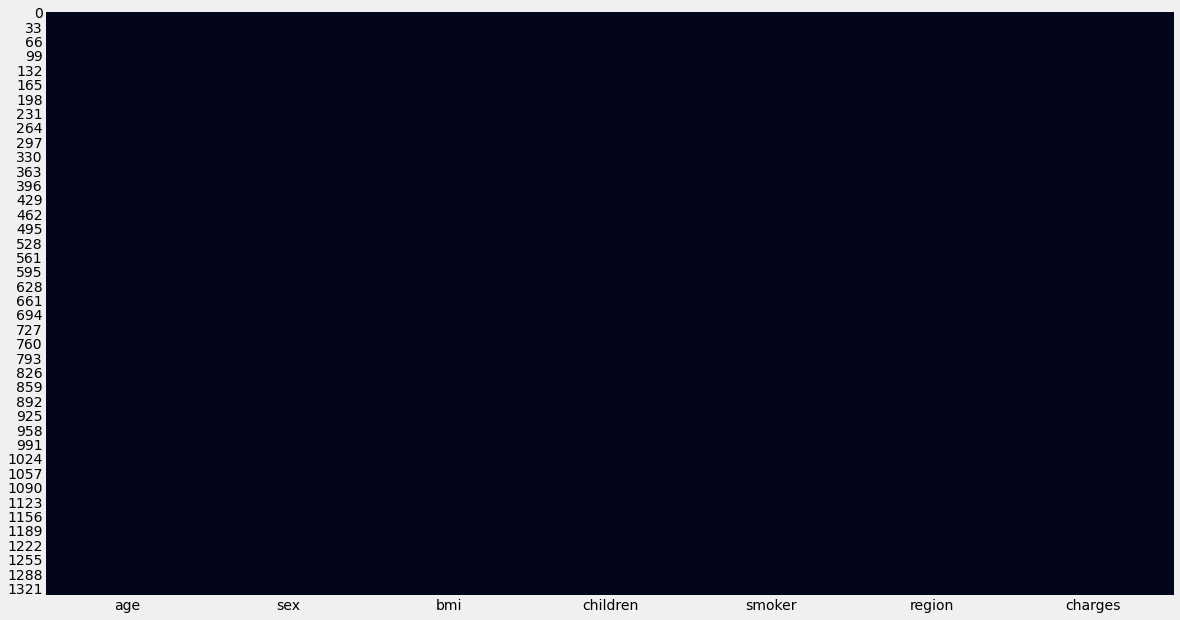

In [13]:
plt.figure(figsize=(18, 10))
sns.heatmap(Assurance.isna(), cbar=False)
plt.show()

In [14]:
# Il n'y a pas de données manquantes dans ce dataset

In [15]:
n_samples, n_features = Assurance.shape
(Assurance.isna().sum()/n_samples).sort_values()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Variable cible

In [16]:
Assurance["charges"].value_counts()

8825.086000     1
4399.731000     1
5257.507950     1
1980.070000     1
4340.440900     1
5375.038000     1
8219.203900     1
1621.340200     1
6986.697000     1
43254.417950    1
4646.759000     1
8283.680700     1
11289.109250    1
9283.562000     1
1720.353700     1
3021.809150     1
26018.950520    1
3877.304250     1
10226.284200    1
43813.866100    1
4837.582300     1
8026.666600     1
5979.731000     1
39836.519000    1
7358.175650     1
18903.491410    1
8017.061150     1
1131.506600     1
16657.717450    1
7639.417450     1
17560.379750    1
3172.018000     1
12646.207000    1
7740.337000     1
2755.020950     1
9048.027300     1
3238.435700     1
11830.607200    1
40904.199500    1
12797.209620    1
7985.815000     1
11396.900200    1
3062.508250     1
20277.807510    1
2117.338850     1
8240.589600     1
13143.336650    1
3756.621600     1
9411.005000     1
1135.940700     1
6710.191900     1
1137.011000     1
11082.577200    1
4149.736000     1
7345.726600     1
2643.26850

In [17]:
# La variable cible est de type continue

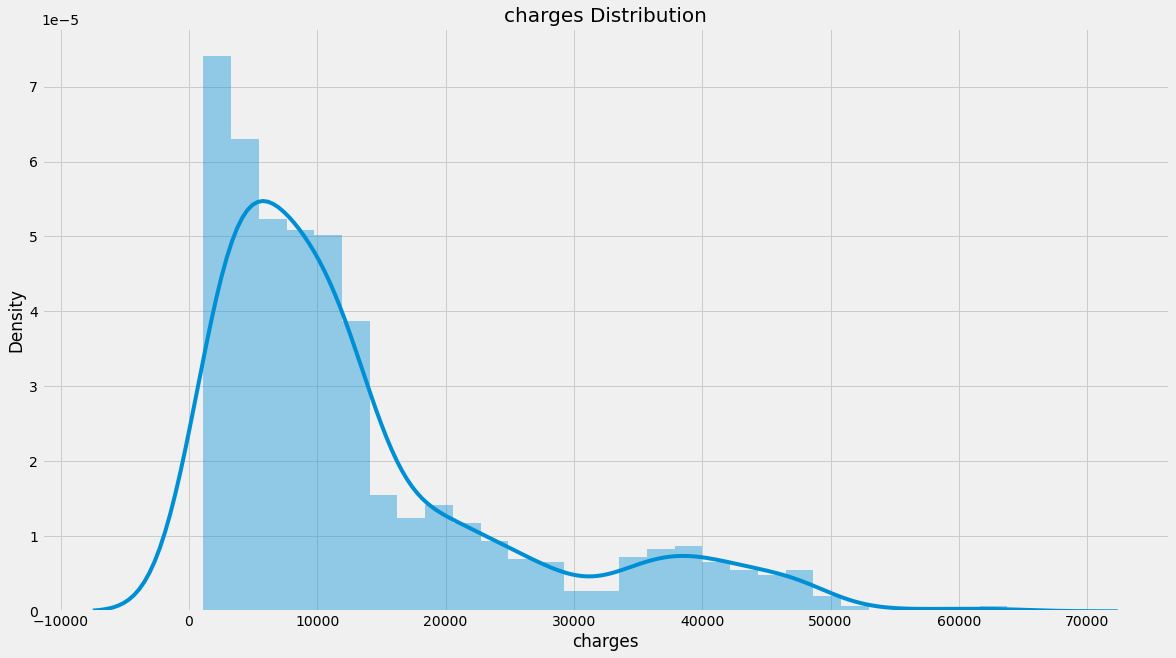

In [18]:
plt.figure(figsize=(18,10))
sns.distplot(Assurance["charges"])
plt.title('{} Distribution'.format("charges"), fontsize=20)
plt.show()

In [19]:
# On affiche la variable continue charge

# Analyse univariée

In [20]:
Assurance.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

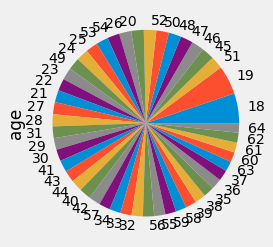

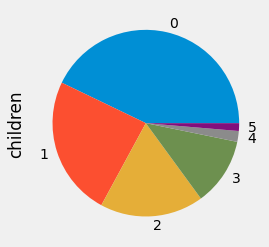

In [21]:
for feature in Assurance.select_dtypes('Int64'):
    plt.figure()
    Assurance[feature].value_counts().plot.pie()
    plt.show()

In [22]:
# Age est plutôt une varaible continue que catégorielle

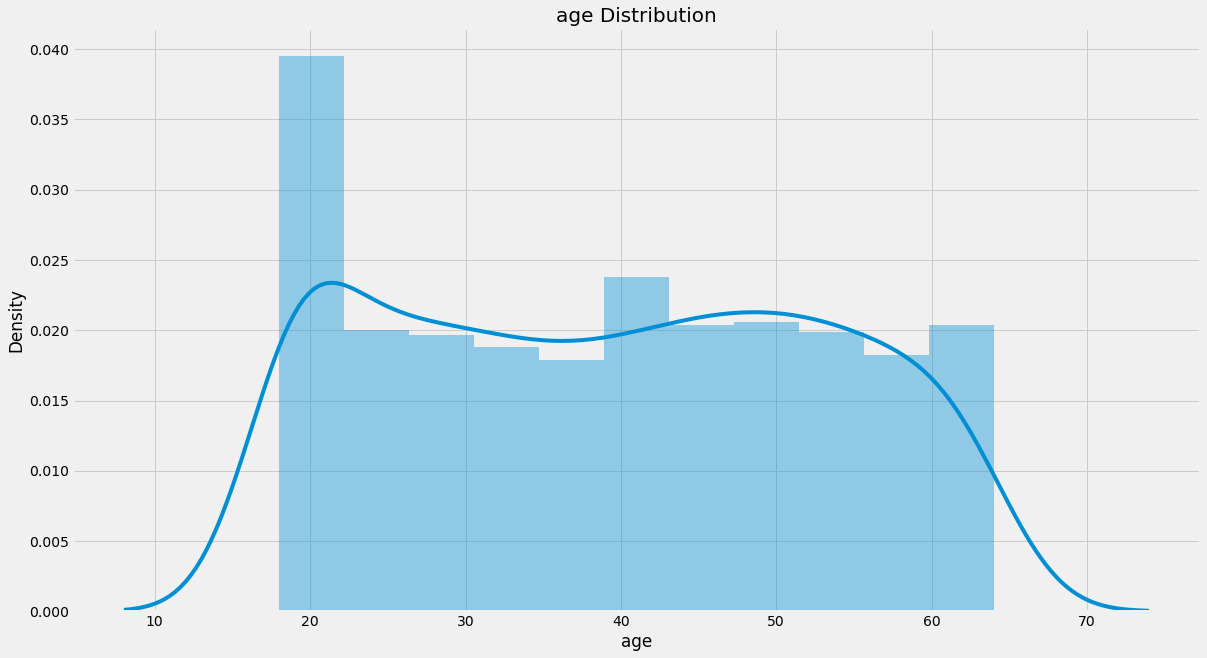

In [23]:
plt.figure(figsize=(18,10))
sns.distplot(Assurance["age"])
plt.title('{} Distribution'.format("age"), fontsize=20)
plt.show()

In [24]:
# On peut constater que les ages sont plutot bien répartis dans ce dataset

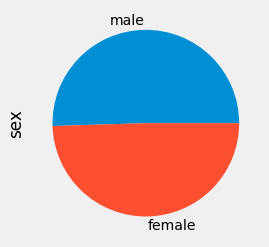

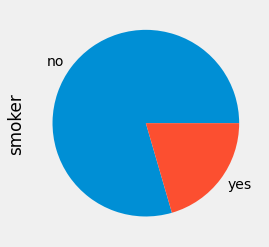

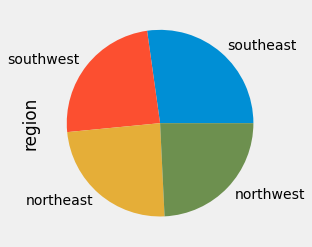

In [25]:
for feature in Assurance.select_dtypes('object'):
    plt.figure()
    Assurance[feature].value_counts().plot.pie()
    plt.show()

In [26]:
# Le sex et les région d'origine sont aussi bien équilibré

# Distribution des variables numériques

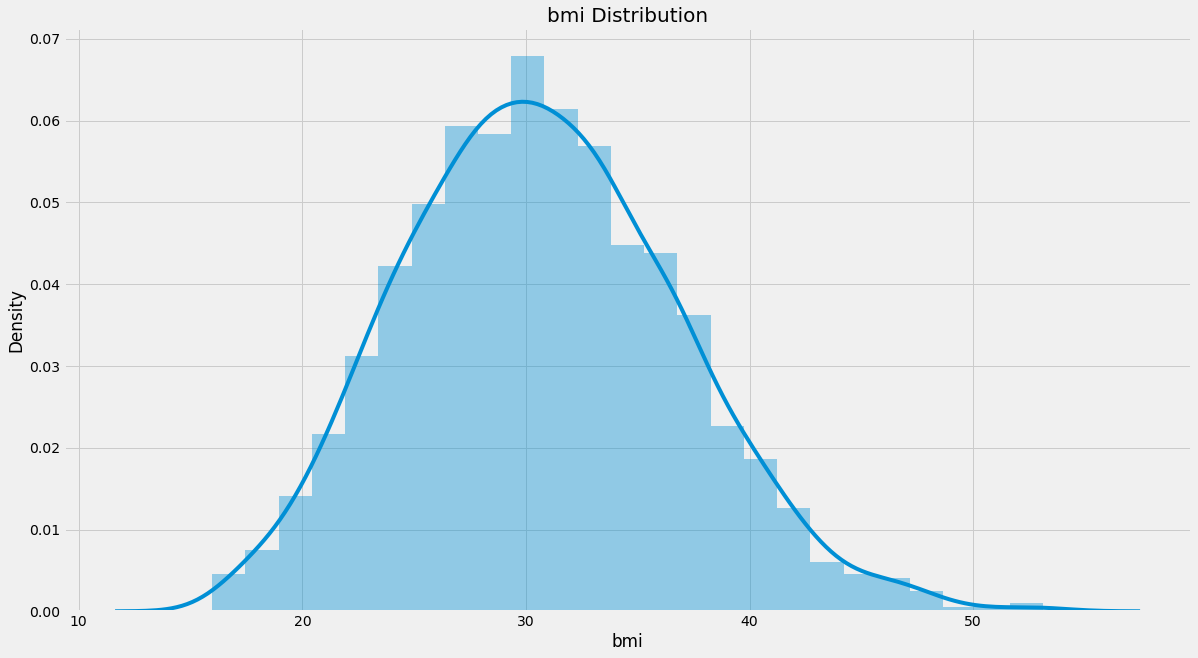

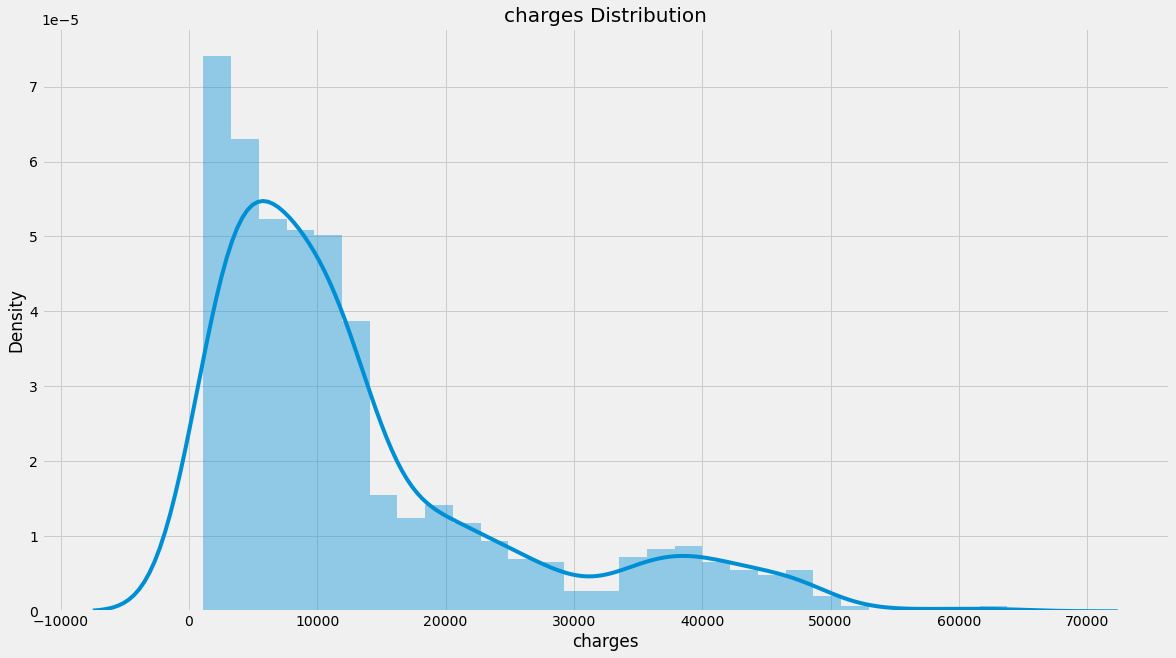

In [27]:
for feature in Assurance.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Assurance[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [28]:
# La variable bmi corespond à l'IMC des personnes la distibution de cette varaible est gaucienne, 
# il semblerais que ce soit vers 30 ans que les gens ont le plus grand indice de masse corporelle

# Corrélation

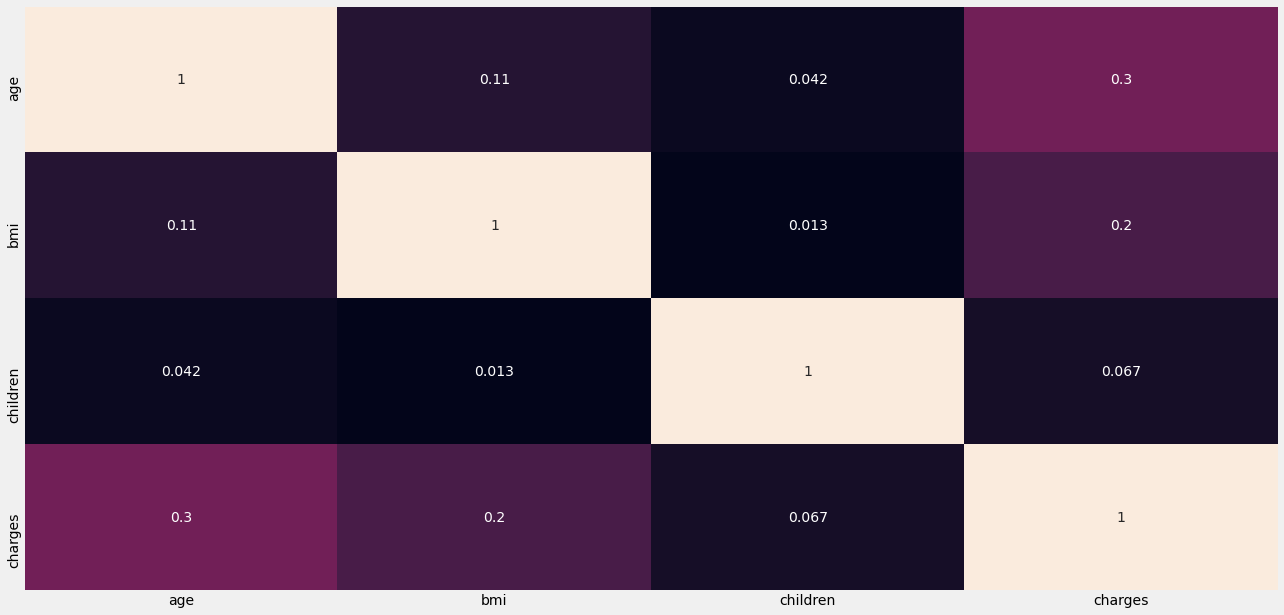

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(Assurance.corr(), annot=True, cbar=False) #
plt.show()

In [30]:
# On voit qu'il y a une faible corélation de l'age et de l'imc

In [31]:
# La corrélation doit être plus grande avec les variables catégorielles

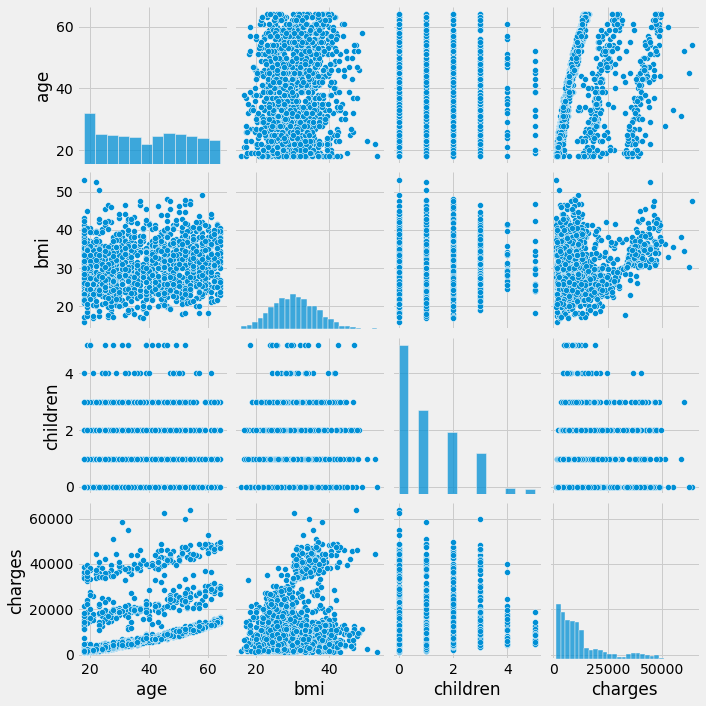

In [32]:
sns.pairplot(Assurance)
plt.show()

In [33]:
# On voit très distinctement 3 corrélation entre l'age et les chages [il exite 3 types de tarifs]

# Analyse bivariée

Text(0.5, 0, 'Charges en fonction du sex')

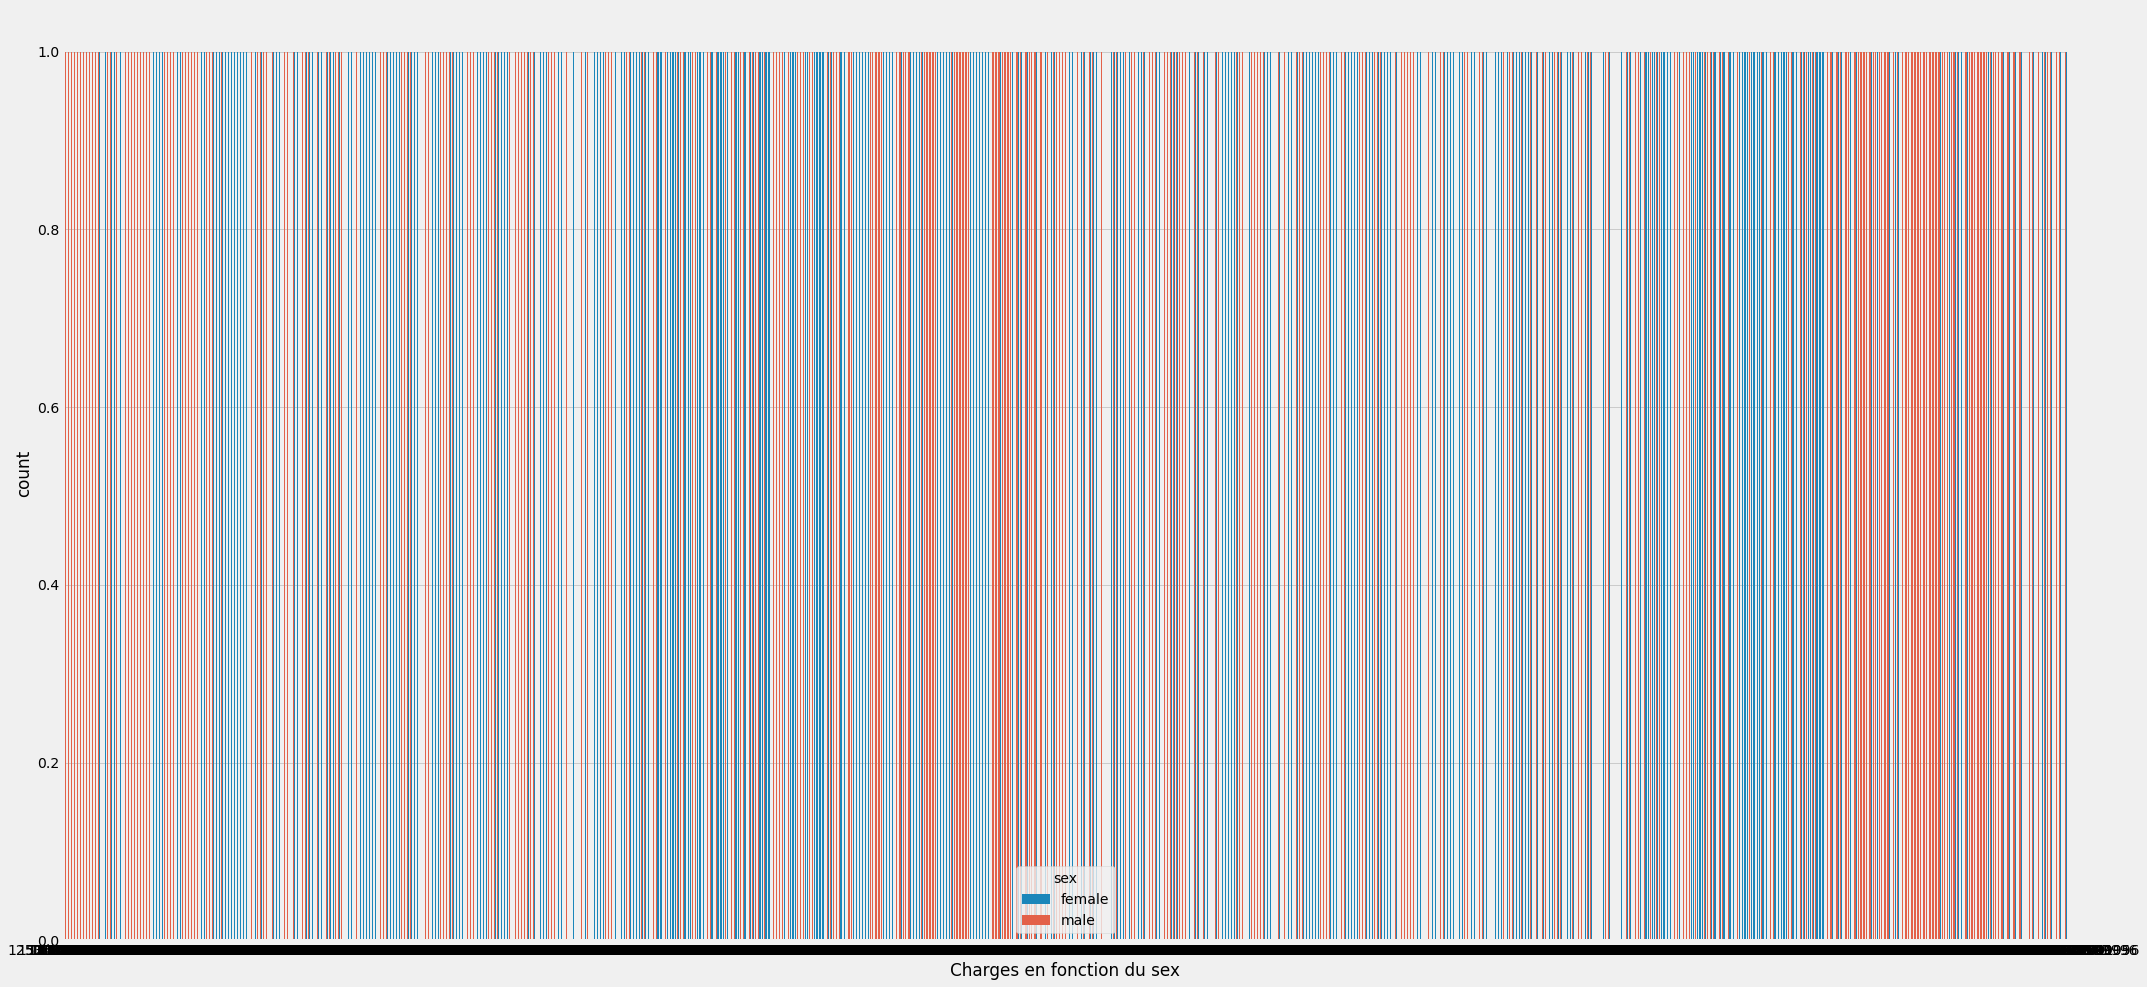

In [34]:
plt.figure(figsize=(32,16))
sns.countplot(x="charges", data=Assurance, hue='sex')
plt.xlabel("Charges en fonction du sex")

Text(0.5, 0, "Charges en fonction de si l'on fume ou pas")

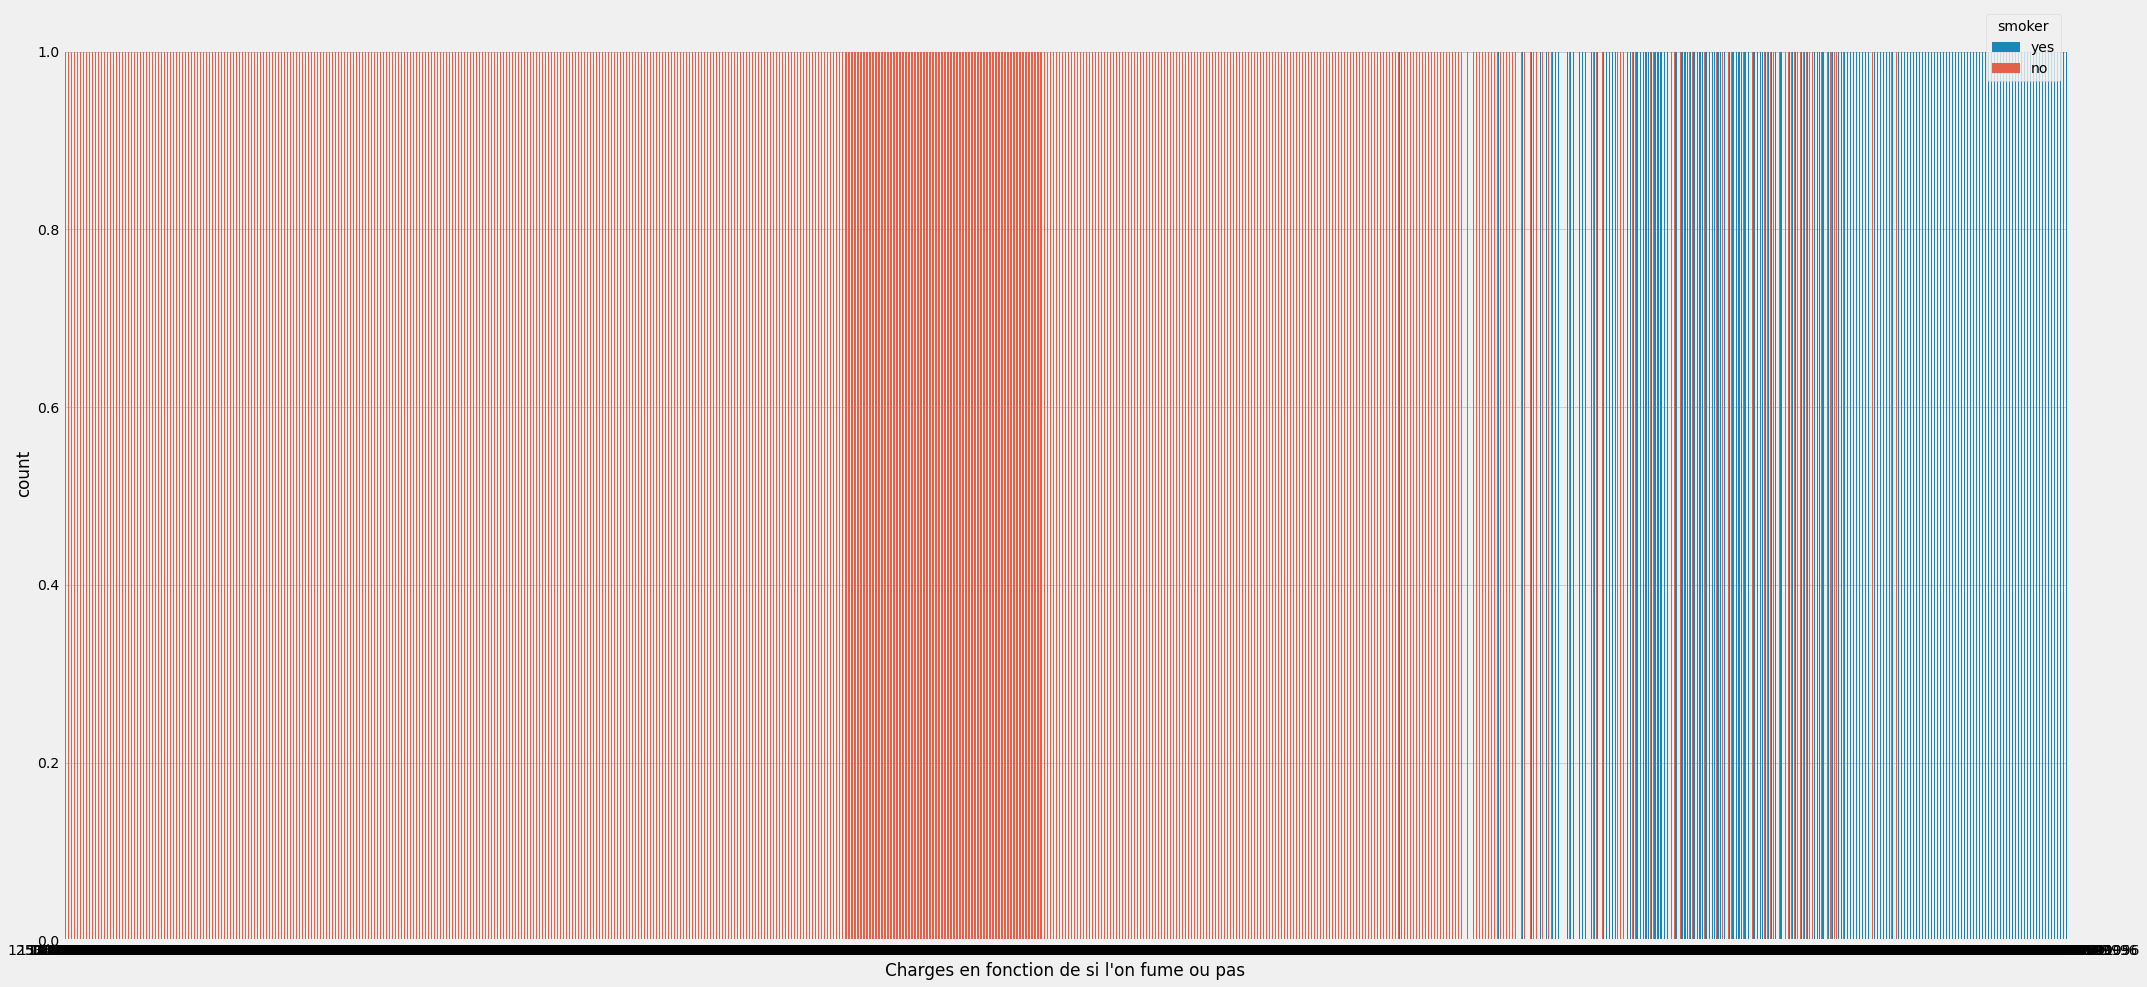

In [35]:
plt.figure(figsize=(32,16))
sns.countplot(x="charges", data=Assurance, hue='smoker')
plt.xlabel("Charges en fonction de si l'on fume ou pas")

In [36]:
# Le sex n'as pas de réél influence sur les chages (un peu pour les hommes) , cependant, 
# il est évident sur le schéma si dessu que si l'on fume on paye beaucoup plus cher

# Pré-Traitement

In [37]:
Assurance['age'] = [float(i) for i in Assurance['age']]
# On passe l'age en varaible continue

In [38]:
Assurance['sex']

0       female
1         male
2         male
3         male
4         male
5       female
6       female
7       female
8         male
9       female
10        male
11      female
12        male
13      female
14        male
15        male
16      female
17        male
18        male
19        male
20      female
21      female
22        male
23      female
24        male
25      female
26      female
27      female
28        male
29        male
30        male
31      female
32      female
33        male
34        male
35        male
36      female
37        male
38        male
39        male
40      female
41      female
42        male
43      female
44        male
45        male
46      female
47      female
48      female
49        male
50      female
51      female
52        male
53        male
54      female
55        male
56      female
57        male
58      female
59      female
60        male
61        male
62        male
63      female
64      female
65      female
66      fe

In [39]:
Assurance['sex'] = [0 if i == 'male' else 1  for i in Assurance['sex']]

In [40]:
Assurance['smoker']

0       yes
1        no
2        no
3        no
4        no
5        no
6        no
7        no
8        no
9        no
10       no
11      yes
12       no
13       no
14      yes
15       no
16       no
17       no
18       no
19      yes
20       no
21       no
22       no
23      yes
24       no
25       no
26       no
27       no
28       no
29      yes
30      yes
31       no
32       no
33       no
34      yes
35       no
36       no
37       no
38      yes
39      yes
40       no
41       no
42       no
43       no
44       no
45       no
46       no
47       no
48       no
49      yes
50       no
51       no
52      yes
53      yes
54       no
55      yes
56       no
57      yes
58      yes
59       no
60       no
61       no
62       no
63       no
64      yes
65       no
66       no
67       no
68       no
69      yes
70      yes
71       no
72       no
73       no
74       no
75       no
76       no
77       no
78       no
79       no
80       no
81       no
82      yes
83  

In [41]:
Assurance['smoker'] = [0 if i == 'no' else 1 for i in Assurance['smoker']]

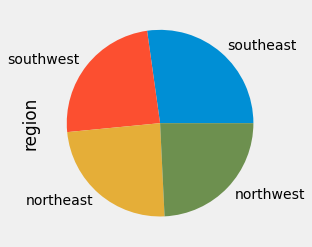

In [42]:
plt.figure()
Assurance['region'].value_counts().plot.pie()
plt.show()

In [43]:
Assurance['region'] = [0 if i == 'southwest' else 1 if i == 'southeast' else 2 if i == 'northwest' else 3 for i in Assurance['region']]

In [44]:
Assurance.dtypes.value_counts() #Transformation des variables 

int64      4
float64    3
dtype: int64

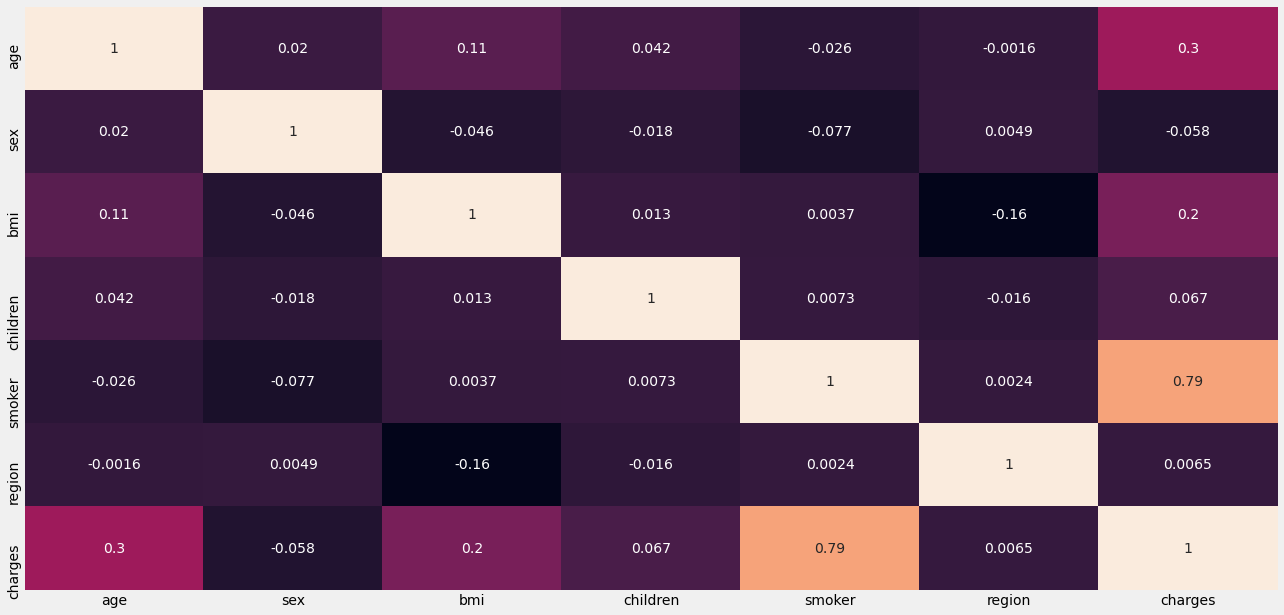

In [45]:
plt.figure(figsize=(20, 10))
sns.heatmap(Assurance.corr(), annot=True, cbar=False) #
plt.show()

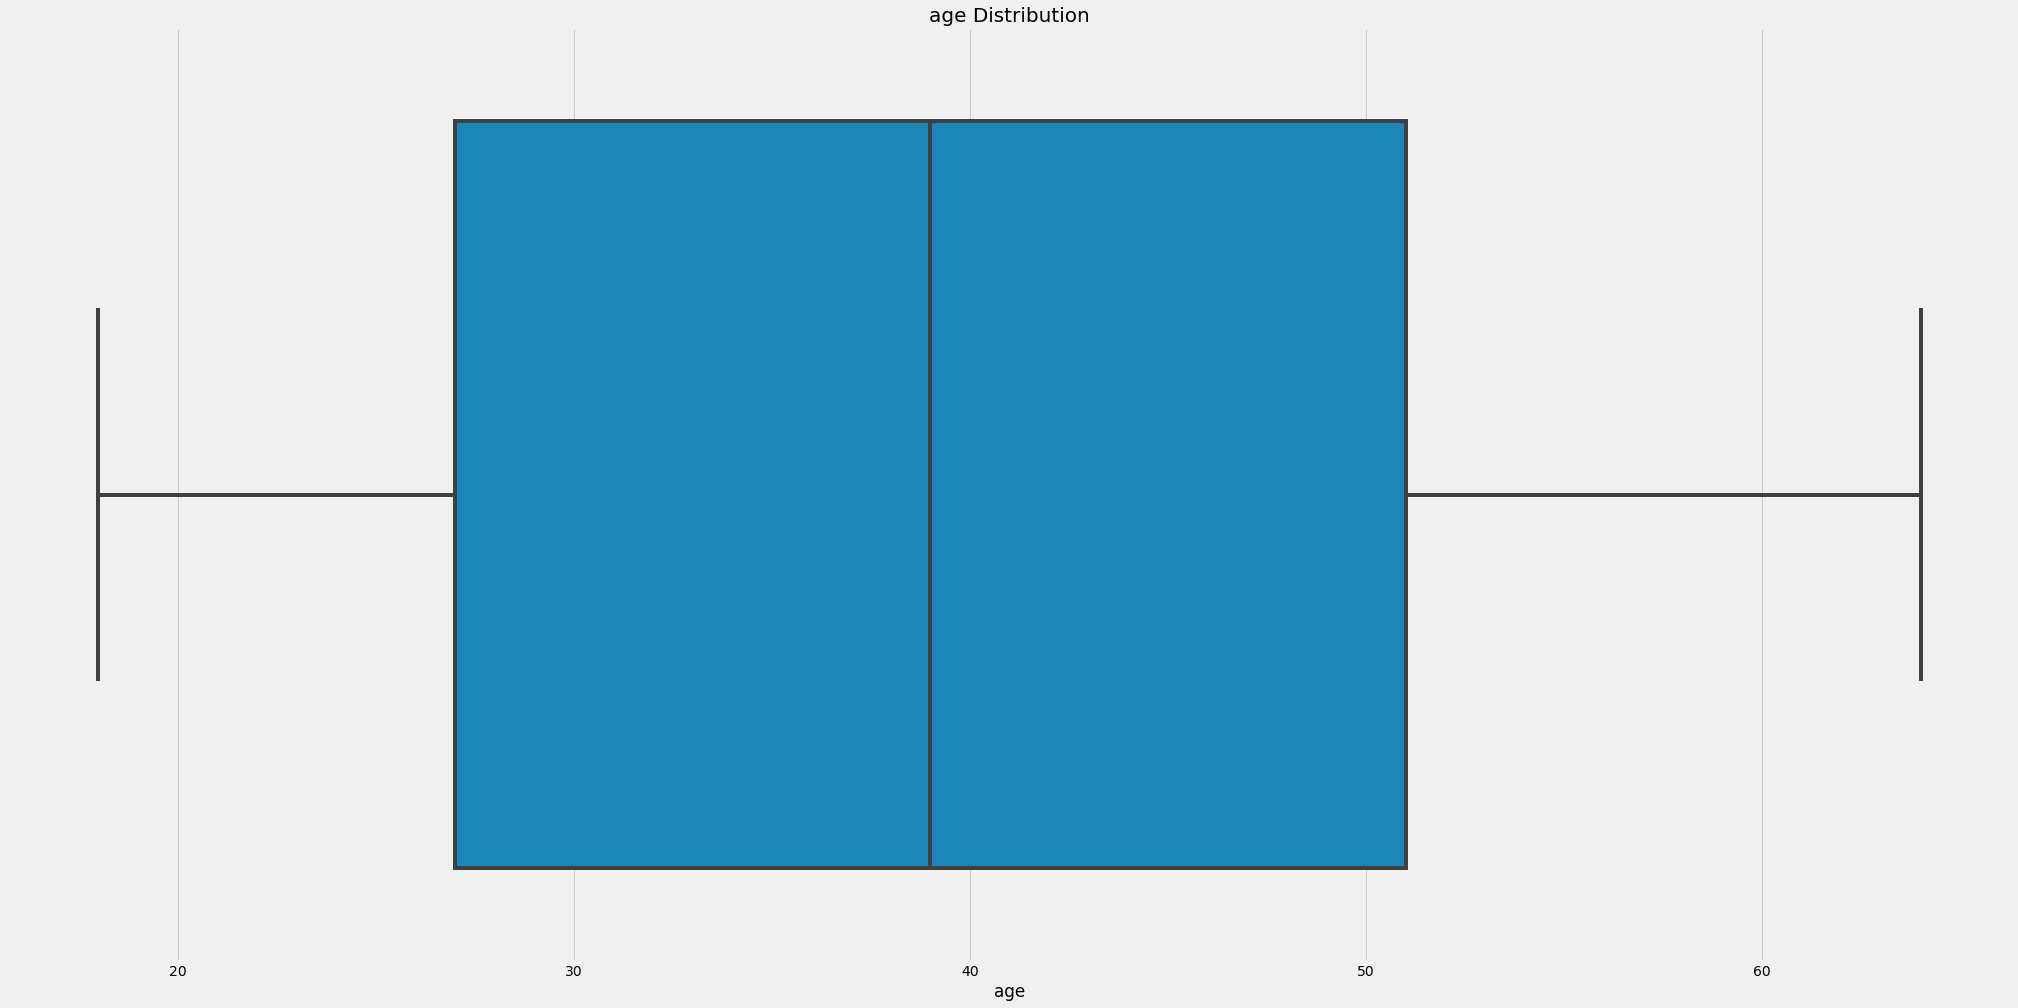

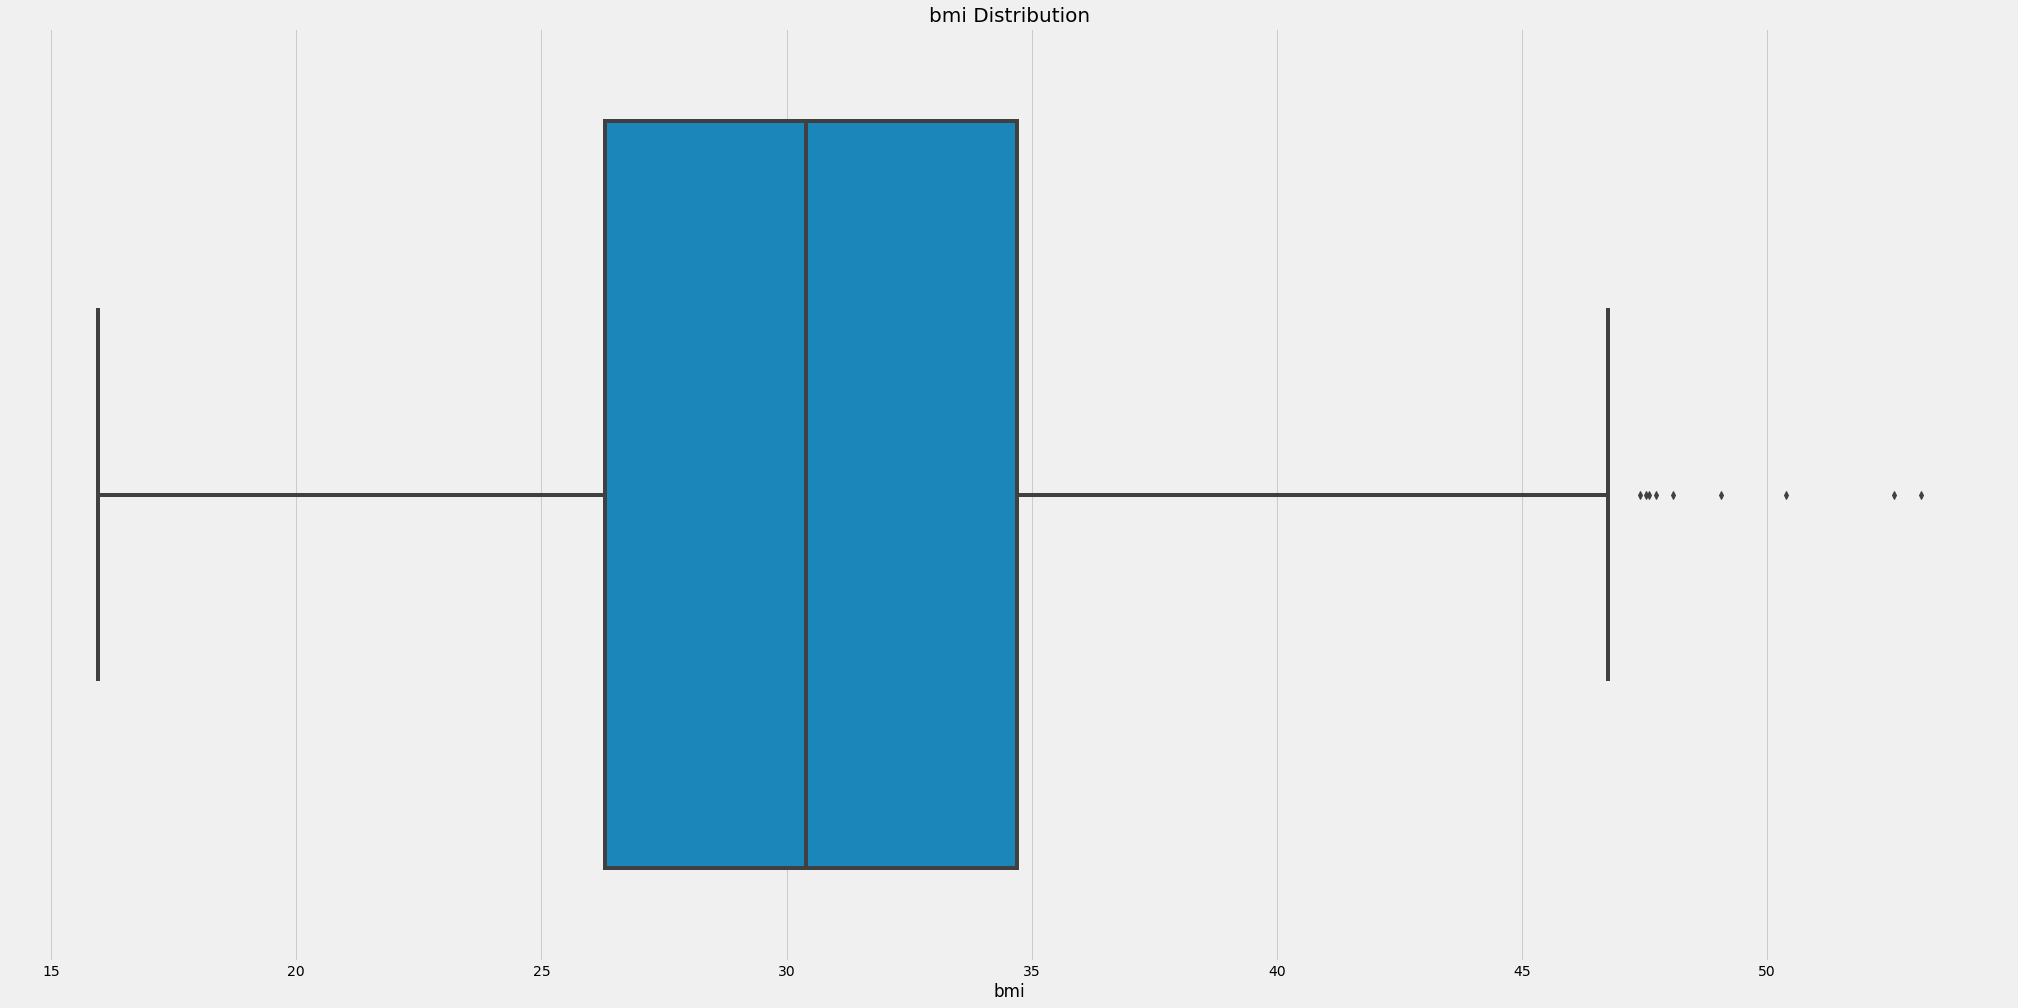

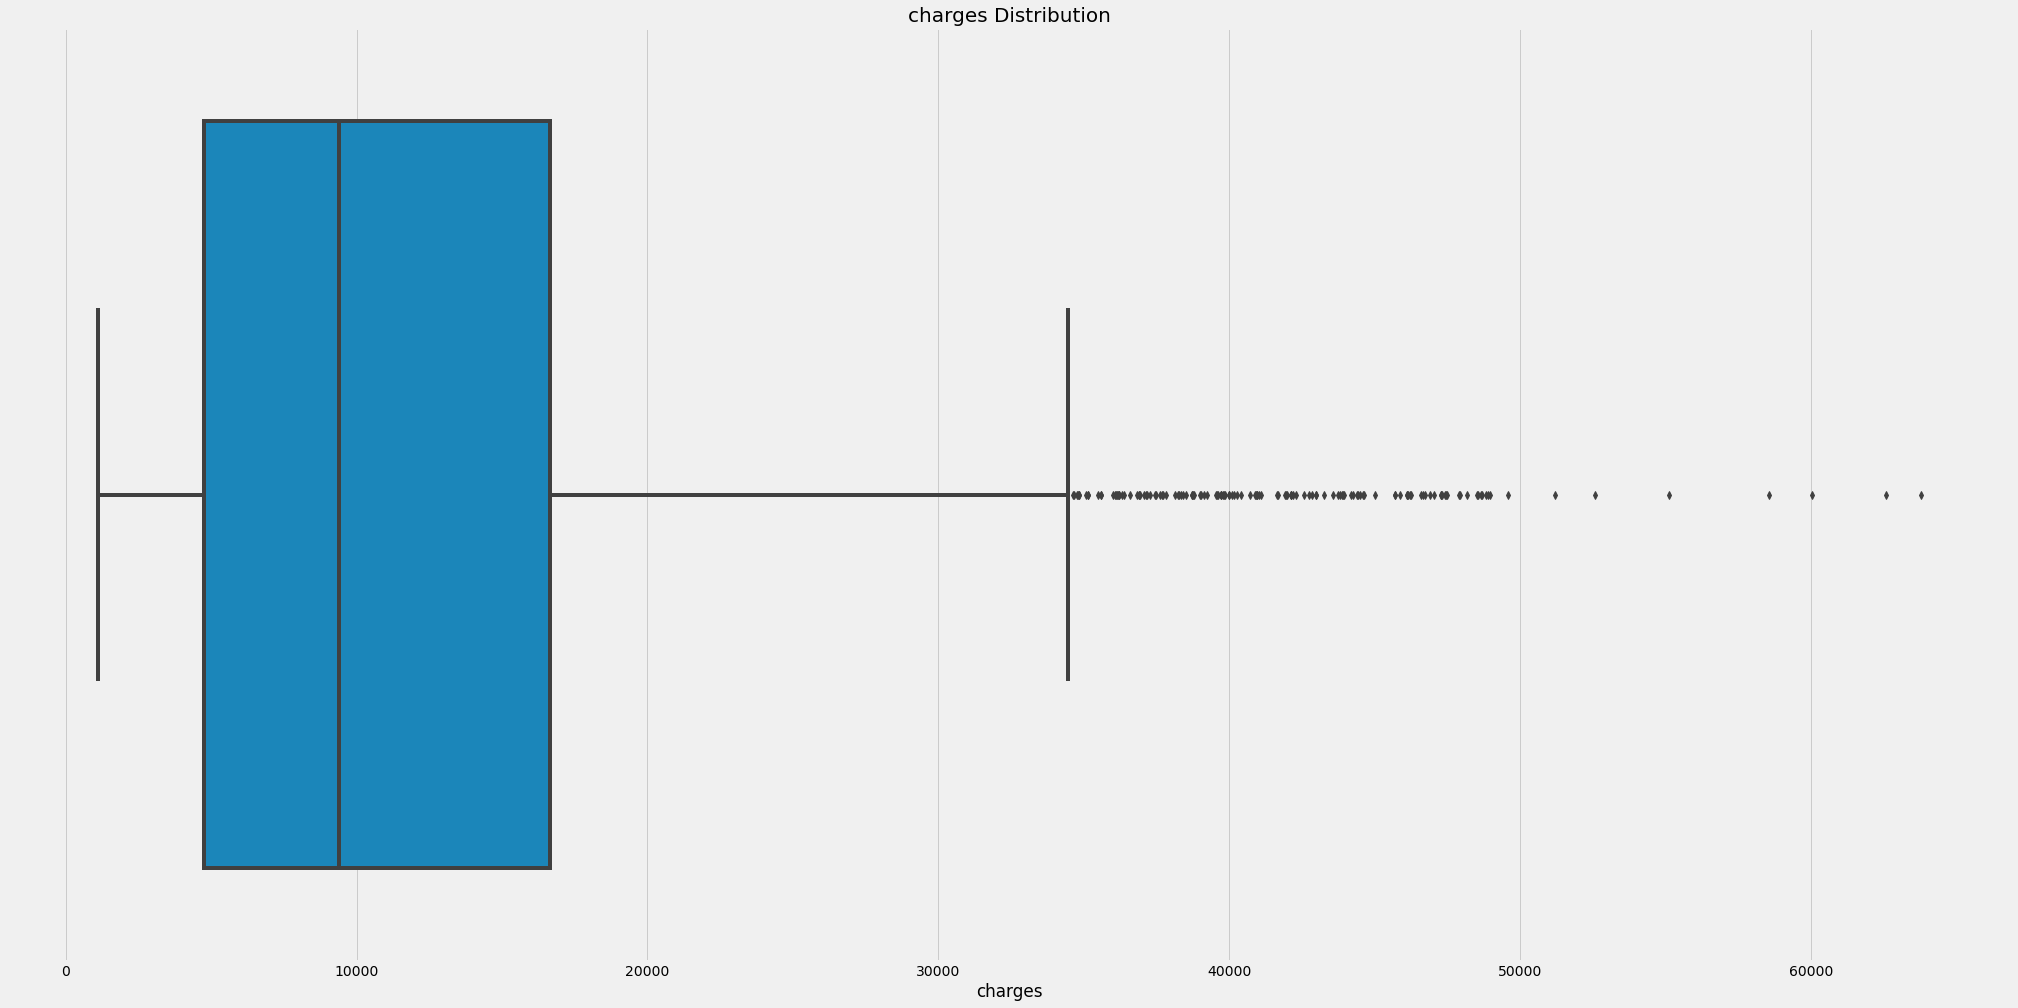

In [46]:
for feature in Assurance.select_dtypes('float64'):
    plt.figure(figsize=(32,16))
    sns.boxplot(x=Assurance[feature], data=Assurance, hue='charges')
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [47]:
Assurance = Assurance[Assurance['bmi'] < 47]
Assurance_t1 = Assurance[Assurance['charges'] < 15000]
Assurance_t2 = Assurance[Assurance['charges'] > 15000]
Assurance_t2 = Assurance_t2[Assurance_t2['charges'] < 30000]
Assurance_t3 = Assurance[Assurance['charges'] > 30000]
Assurance_t3 = Assurance_t3[Assurance_t3['charges'] < 45000]
# On représente les 3 tarifs disticts, il nous manque une variable pour les trier
# Ici je vais me concentrer sur t1 qui est est la classe majoritaire
Assurance = Assurance_t1
# On supprime les valeurs abérantes
del Assurance["children"]
del Assurance["sex"]

# X_train, X_test, y_train, y_test

In [48]:
X = Assurance.drop('charges', axis=1)
y = Assurance['charges']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
len(y_train), len(y_test)

(778, 195)

In [51]:
X_train.head()

,age,bmi,smoker,region
25,59.0,27.720,0,1
1261,28.0,37.100,0,0
692,20.0,32.395,0,2
442,18.0,43.010,0,1
483,51.0,39.500,0,0


# Regression linéaire simple

In [52]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

In [54]:
# score sur le test d'entraintement
# R2: évalue la performance du modèle par rapport au niveau de variation présent dans les données 
score = linreg.score(X_train, y_train)
score

0.8634942942323542

In [75]:
# score sur le test d'entraintement cross-validé
score_val = cross_val_score(linreg, X_train, y_train, cv=5)
score_val.mean()

0.8615126170646026

In [69]:
score_val = cross_val_score(linreg, X_train, y_train, cv=10)
score_val.mean()

0.8612362891235686

In [57]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse

1431.4964490768373

In [58]:
# Median absolute error 
medae= median_absolute_error(y_train, y_pred_train)
medae

586.6351337589558

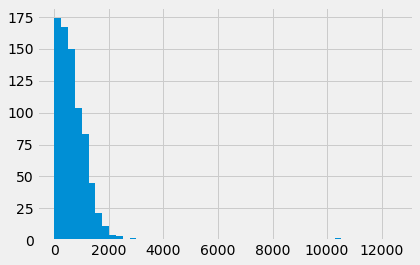

In [59]:
# distribution des erreurs
hist_erreurs = np.abs(y_train - y_pred_train)
plt.hist(hist_erreurs, bins=50)
plt.show()

# Courbe d'apprentissage

In [60]:
N, train_score, val_score = learning_curve(linreg, X_train, y_train, # vidéo 21
                                               cv=4,
                                               train_sizes=np.linspace(0.1, 1, 10))

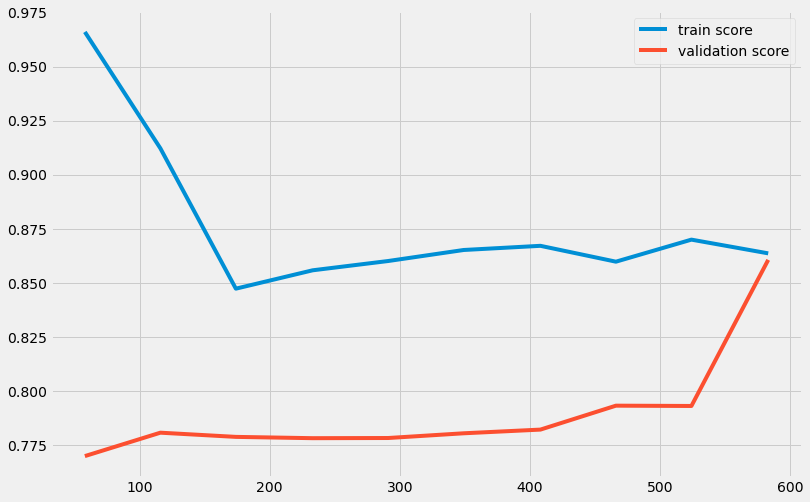

In [61]:
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

<AxesSubplot:xlabel='charges'>

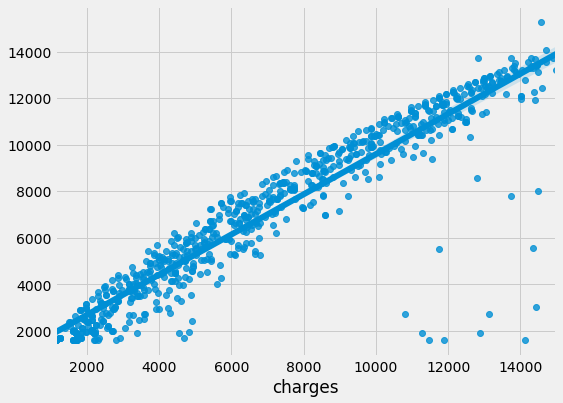

In [62]:
# visulation de la droite linéaire
plt.rcParams["figure.figsize"] = (8,6)
sns.regplot(x=y_train,y=y_pred_train)

Text(0.5, 1.0, 'Résidus')

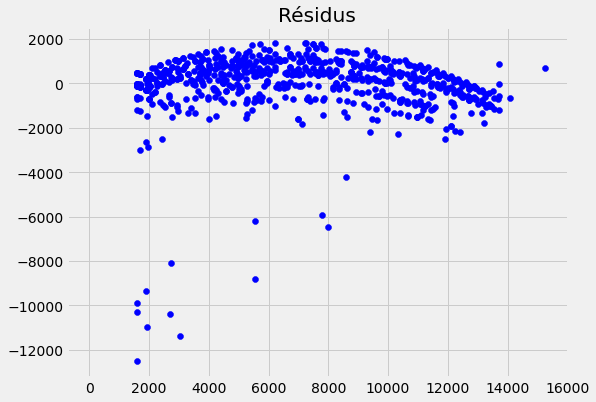

In [63]:
# Distributions des résidus
xmin=10.5
xmax=13.5
x_plot = plt.scatter(y_pred_train, (y_pred_train - y_train), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Résidus')

<AxesSubplot:title={'center':'Poids de régression'}>

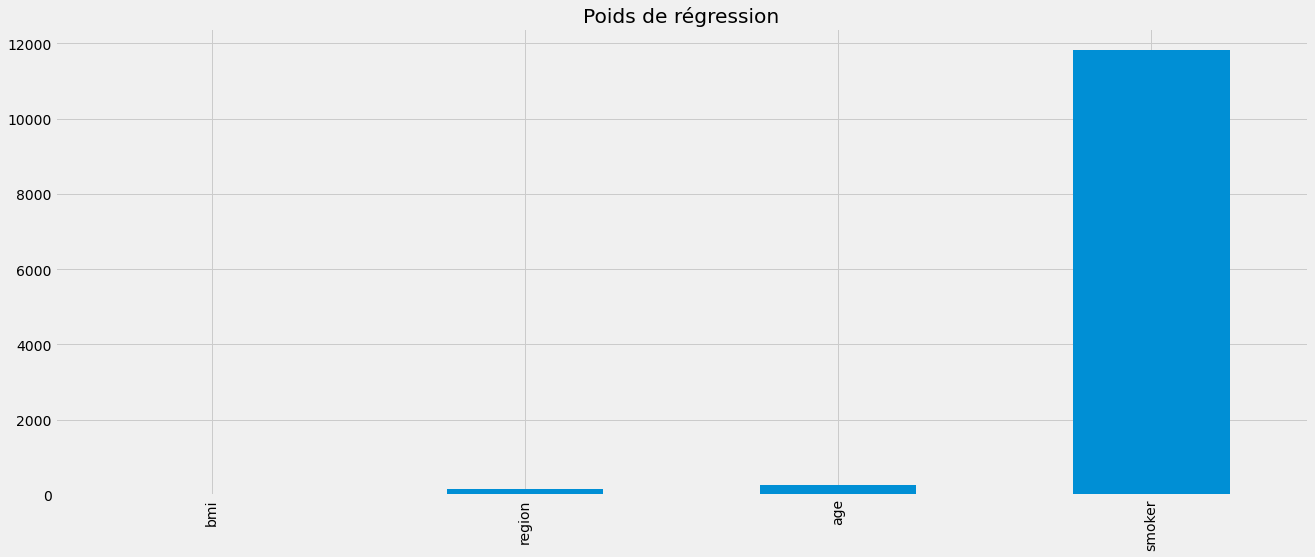

In [64]:
# graphique des coefficients
plt.figure(figsize=(20,8))
predictors = X_train.columns
coef = pd.Series(linreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Poids de régression')